In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier

In [2]:
# Reading train data
train = pd.read_csv('train.csv')
print("Train data")
display(train.head())

# Reading test data
test = pd.read_csv('test.csv')
print("Test data")
display(test.head())

Train data


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Test data


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [8]:
# Understanding data
print("Train data shape =", train.shape)
print("Test data shape =", test.shape)

Train data shape = (891, 12)
Test data shape = (418, 11)


In [9]:
# Information related to data
print("Train data")
train.info()
print()
print("Test data")
test.info()

Train data
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB

Test data
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null   

In [6]:
# Statistical data related to info
print("Train Data")
display(train.describe())
print("Test Data")
display(test.describe())

Train Data


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


Test Data


,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [10]:
# Checking for missing values
print("Missing values in the training data:")
display(train.isnull().sum())
print("Missing values in the testing data:")
display(test.isnull().sum())

Missing values in the training data:


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Missing values in the testing data:


PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [3]:
# Drop cabin data from both data sets
train.drop('Cabin', axis=1, inplace=True)
print("Train data")
display(train.head())
test.drop('Cabin', axis=1, inplace=True)
print("Test data")
display(test.head())

Train data


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


Test data


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,S


In [10]:
# Replace missing age data with median values
train['Age'] = train['Age'].fillna(train['Age'].median())
print("Train data: ")
display(train.isnull().sum())
test['Age'] = test['Age'].fillna(test['Age'].median())
print("Test data: ")
display(test.isnull().sum())

Train data: 


PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       2
dtype: int64

Test data: 


PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           1
Embarked       0
dtype: int64

In [18]:
# Replace missing embarked data in train set with most common value
# First check most common embarked value
train['Embarked'].value_counts(normalize=True)
train['Embarked'] = train['Embarked'].fillna('S')
display(train.isnull().sum())

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [20]:
# Replace missing fare data in test set with median value
test['Fare'] = test['Fare'].fillna(test['Fare'].median())
display(test.isnull().sum())

PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

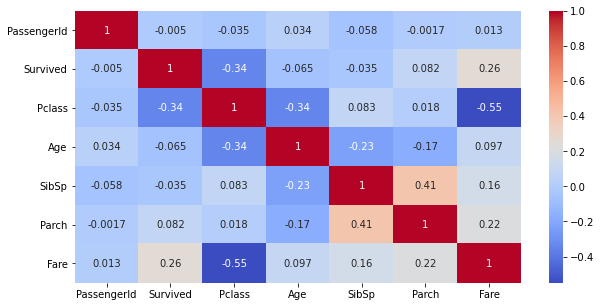

In [43]:
# Display correlation between survivors
plt.figure(figsize=(10,5))
sns.heatmap(train.corr(), cmap='coolwarm', annot=True)

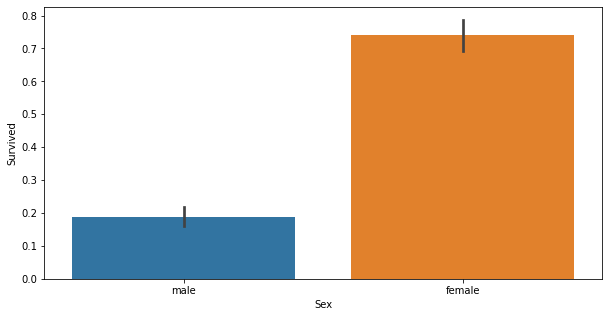

In [51]:
# Data visualization 
# Male vs. females survived %percentage
plt.figure(figsize=(10,5))
sns.barplot(x='Sex', y= 'Survived', data= train)

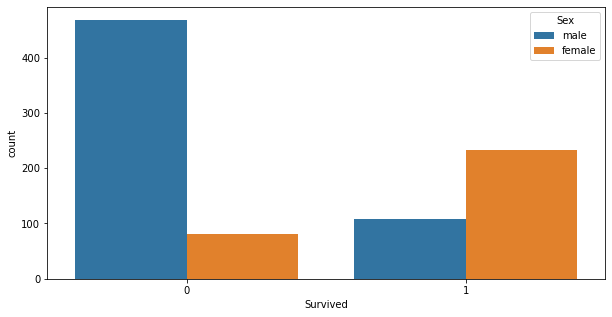

In [52]:
# Male vs. females survived #count
plt.figure(figsize=(10,5))
sns.countplot(x='Survived',  hue='Sex', data=train)

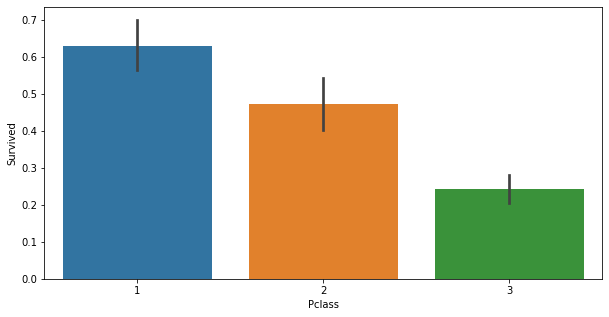

In [53]:
# Passenger class vs. survived %percentage
plt.figure(figsize=(10,5))
sns.barplot(x='Pclass', y='Survived', data = train)

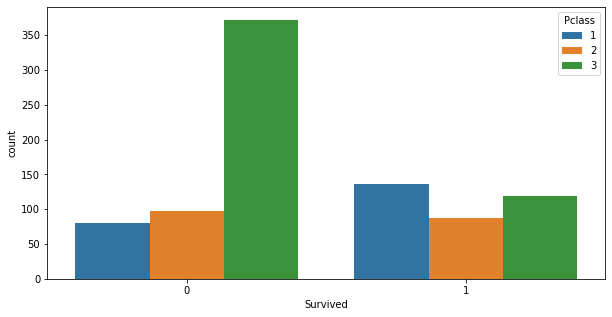

In [54]:
# Passenger class vs. survived #count
plt.figure(figsize=(10,5))
sns.countplot(x='Survived',  hue='Pclass', data=train)

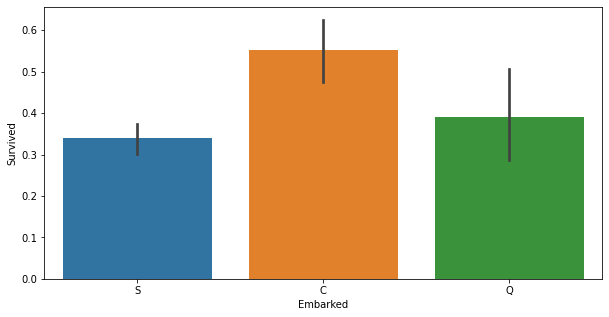

In [56]:
# Embarked vs. survived %percentage
plt.figure(figsize=(10,5))
sns.barplot(x='Embarked', y= 'Survived', data= train)

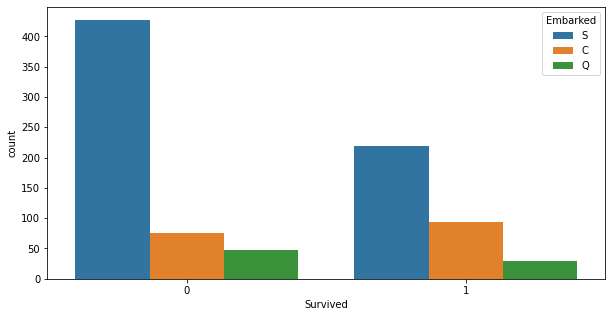

In [55]:
# Embarked vs. survived #count
plt.figure(figsize=(10,5))
sns.countplot(x='Survived', hue= 'Embarked', data= train)

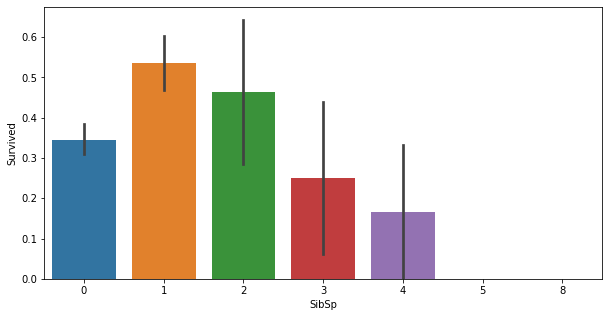

In [57]:
# Passengers with siblings and spouses vs. survived %percentage
plt.figure(figsize=(10,5))
sns.barplot(x='SibSp', y='Survived', data = train)

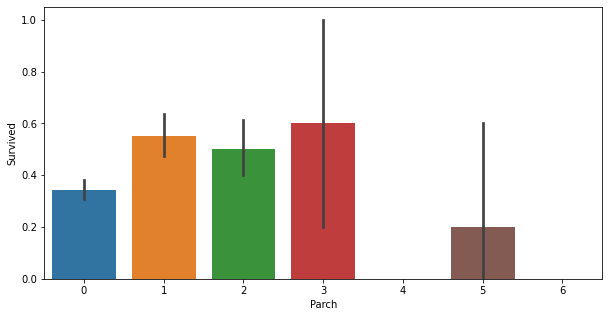

In [60]:
# Passengers with parents and children vs. survived %percentage
plt.figure(figsize=(10,5))
sns.barplot(x='Parch', y='Survived', data = train)

In [61]:
# Look at train and test set data again 
print('Train data:')
display(train.head())
print('Test data:')
display(test.head())

Train data:


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


Test data:


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,S


In [62]:
# Drop non useful columns e.g. PassengerId, Name, Ticket from train and test set
train.drop(['PassengerId', 'Name', 'Ticket'], axis=1, inplace= True)
test.drop(['PassengerId', 'Name', 'Ticket'], axis=1, inplace= True)
print('Train data:')
display(train.head())
print('Test data:')
display(test.head())

Train data:


,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


Test data:


,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,34.5,0,0,7.8292,Q
1,3,female,47.0,1,0,7.0000,S
2,2,male,62.0,0,0,9.6875,Q
3,3,male,27.0,0,0,8.6625,S
4,3,female,22.0,1,1,12.2875,S


In [63]:
# Categorical values to numerical values in both train and test set e.g. Sex, Embarked
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
train['Embarked'] = label_encoder.fit_transform(train['Embarked'])
train['Sex'] = label_encoder.fit_transform(train['Sex'])
test['Embarked'] = label_encoder.fit_transform(test['Embarked'])
test['Sex'] = label_encoder.fit_transform(test['Sex'])
print('Train set:')
display(train.head())
print('Test set:')
display(test.head())

Train set:


,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,2
1,1,1,0,38.0,1,0,71.2833,0
2,1,3,0,26.0,0,0,7.9250,2
3,1,1,0,35.0,1,0,53.1000,2
4,0,3,1,35.0,0,0,8.0500,2


Test set:


,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,1,34.5,0,0,7.8292,1
1,3,0,47.0,1,0,7.0000,2
2,2,1,62.0,0,0,9.6875,1
3,3,1,27.0,0,0,8.6625,2
4,3,0,22.0,1,1,12.2875,2


In [70]:
# Scaling for Age and Fare
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
train[['Age', 'Fare']]=scaler.fit_transform(train[['Age', 'Fare']])
test[['Age', 'Fare']]=scaler.fit_transform(test[['Age', 'Fare']])
print('Train set:')
display(train.head())
print('Test set:')
display(test.head())

Train set:


,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,-0.565736,1,0,-0.502445,2
1,1,1,0,0.663861,1,0,0.786845,0
2,1,3,0,-0.258337,0,0,-0.488854,2
3,1,1,0,0.433312,1,0,0.420730,2
4,0,3,1,0.433312,0,0,-0.486337,2


Test set:


,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,1,0.386231,0,0,-0.497413,1
1,3,0,1.371370,1,0,-0.512278,2
2,2,1,2.553537,0,0,-0.464100,1
3,3,1,-0.204852,0,0,-0.482475,2
4,3,0,-0.598908,1,1,-0.417492,2
